<a href="https://colab.research.google.com/github/chocomaltt/FileUpload/blob/main/Case_Method2_Kelompok_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Anggota kelompok:
1. Bonifasius Ekky K
2. Irsyad Danisaputra
3. Reza Arya Wijaya

In [200]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [208]:
path_gelap = '/content/drive/MyDrive/PCVK/img/Salinan selfie - 4.png'
path_terang = '/content/drive/MyDrive/PCVK/img/Salinan selfie - 2.png'

In [202]:
%pip install mtcnn

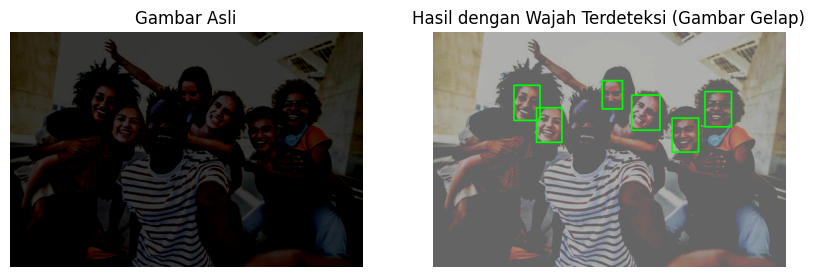

In [225]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mtcnn import MTCNN

def adjust_brightness(image, alpha=1.0, beta=0, highlight_factor=2., exposure_factor=1.):
    """
    Mengatur kecerahan gambar, highlight, dan exposure.
    :param image: Gambar input (numpy array).
    :param alpha: Skala kecerahan (default 1.0; lebih tinggi untuk lebih cerah).
    :param beta: Nilai offset kecerahan (default 0; positif untuk lebih cerah).
    :param highlight_factor: Faktor untuk menyesuaikan highlight.
    :param exposure_factor: Faktor untuk menyesuaikan exposure.
    :return: Gambar dengan kecerahan, highlight, dan exposure yang disesuaikan.
    """
    # Konversi gambar ke float untuk manipulasi
    img_float = image.astype(np.float32)

    # Adjust brightness
    img_float = cv2.convertScaleAbs(img_float, alpha=alpha, beta=beta)

    # Adjust highlight (menambah atau mengurangi highlight)
    img_float = np.clip(img_float * highlight_factor, 0, 255)

    # Adjust exposure (menambah atau mengurangi exposure)
    img_float *= exposure_factor

    # Konversi kembali ke uint8
    adjusted_image = np.uint8(img_float)

    return adjusted_image

def detect_and_draw_faces(image):
    """
    Mendeteksi wajah pada gambar dan menggambar kotak di sekitarnya.
    :param image: Gambar input (numpy array).
    :return: Gambar dengan kotak wajah.
    """
    detector = MTCNN()
    faces = detector.detect_faces(image)

    for face in faces:
        x, y, width, height = face['box']
        cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

    return image

# Path ke gambar
image_path = "/content/selfie - 2.png"  # Ganti dengan path gambar Anda

# Membaca gambar
image = cv2.imread(path_gelap)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR ke RGB

# Mengatur kecerahan untuk mempergelap gambar
dark_image = adjust_brightness(image, alpha=0.7, beta=50)  # Alpha < 1, Beta < 0

# Deteksi wajah dan gambar kotak
result_image = detect_and_draw_faces(dark_image.copy())

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(result_image)
plt.title("Hasil dengan Wajah Terdeteksi (Gambar Gelap)")
plt.axis("off")
plt.show()

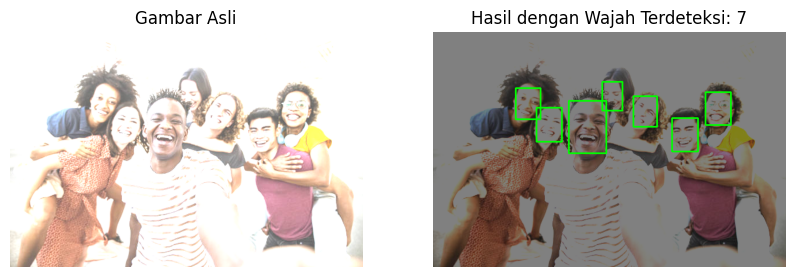

In [219]:

def adjust_brightness(image, alpha=1.0, beta=0):
    """
    Mengatur kecerahan gambar.
    :param image: Gambar input (numpy array).
    :param alpha: Skala kecerahan (default 1.0; lebih tinggi untuk lebih cerah).
    :param beta: Nilai offset kecerahan (default 0; positif untuk lebih cerah).
    :return: Gambar dengan kecerahan yang disesuaikan.
    """
    return cv2.convertScaleAbs(image, alpha=alpha, beta=beta)

def detect_and_draw_faces(image):
    """
    Mendeteksi wajah pada gambar dan menggambar kotak di sekitarnya.
    :param image: Gambar input (numpy array).
    :return: Gambar dengan kotak wajah dan daftar wajah yang terdeteksi.
    """
    detector = MTCNN()
    faces = detector.detect_faces(image)

    for face in faces:
        x, y, width, height = face['box']
        cv2.rectangle(image, (x, y), (x + width, y + height), (0, 255, 0), 2)

    return image, faces  # Mengembalikan gambar dan daftar wajah yang terdeteksi

# Membaca gambar
image = cv2.imread(path_terang)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR ke RGB

# Mengatur kecerahan untuk mempergelap gambar
dark_image = adjust_brightness(image, alpha=0.7, beta=-50)

# Deteksi wajah dan gambar kotak
result_image, faces = detect_and_draw_faces(dark_image.copy())

# Menampilkan hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Gambar Asli")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(result_image)
plt.title(f"Hasil dengan Wajah Terdeteksi: {len(faces)}")
plt.axis("off")
plt.show()
